In [1]:
import random
import time
import matplotlib.pyplot as plt

In [2]:
start_row = int(input("Please enter the row of the car: "))#Arabanin baslangicta bulundugu nokta, kullanicidan al
start_lane = int(input("Please enter the lane of the car: "))

Please enter the row of the car: 0
Please enter the lane of the car: 1


In [3]:
def print_matrix(A) :
    for i in range (len(A)):
        for k in range (len(A[0])):
            print(A[i][k],end=" ")
        print("\n")
    print("-------------\n")

In [4]:
def roadway_matrix(n):
    B = [[0 for i in range(3)] for j in range(n)]  # nx3 matrix
    for i in range(len(B)):
        z = random.randint(0, 2)
        while i == start_row and z == start_lane:#Arabanin bulundugu noktada obstacle olmamamsi icin
            z = random.randint(0, 2)
        B[i][z] = 1
        for k in range(3):
            if k != z:
                B[i][k] = 0
    return B

def memo_matrix(n):
    memo = [[0 for i in range(3)] for j in range(n)]
    for i in range(len(memo)):
        for k in range(len(memo[0])):
            memo[i][k] = -1
    return memo

In [14]:
n = int(input("Please enter the row number: "))
A = roadway_matrix(n)
memo = memo_matrix(n)

Please enter the row number: 20


In [15]:
print_matrix(A)

0 0 1 

0 1 0 

0 1 0 

0 0 1 

0 1 0 

0 1 0 

0 0 1 

0 0 1 

1 0 0 

0 1 0 

0 0 1 

1 0 0 

0 0 1 

1 0 0 

0 1 0 

1 0 0 

0 1 0 

0 0 1 

0 0 1 

1 0 0 

-------------



In [16]:
print_matrix(memo)

-1 -1 -1 

-1 -1 -1 

-1 -1 -1 

-1 -1 -1 

-1 -1 -1 

-1 -1 -1 

-1 -1 -1 

-1 -1 -1 

-1 -1 -1 

-1 -1 -1 

-1 -1 -1 

-1 -1 -1 

-1 -1 -1 

-1 -1 -1 

-1 -1 -1 

-1 -1 -1 

-1 -1 -1 

-1 -1 -1 

-1 -1 -1 

-1 -1 -1 

-------------



PART (a)

In [17]:
def NAIVE(row, lane, A):
    if row == len(A) or len(A) == 1:
        return 0
    elif A[row][lane] == 1:
        return 1
    else:
        if lane - 1 > 0 and lane + 1 < len(A[0]):
            return min(NAIVE(row + 1, lane - 1, A) + 1, NAIVE(row + 1, lane, A), NAIVE(row + 1, lane + 1, A) + 1)
        elif lane == 0:
            return min(NAIVE(row + 1, lane, A), NAIVE(row + 1, lane + 1, A) + 1)
        else:
            return min(NAIVE(row + 1, lane - 1, A) + 1, NAIVE(row + 1, lane,A))


start = time.time()
result = NAIVE(start_row, start_lane, A)
print(result)
end = time.time()
print("Running time of Naive algorithm: ", end - start)

1
Running time of Naive algorithm:  0.0006420612335205078


In [19]:
#memo: Matrix for memoization
def Top_down_with_Memo(row, lane, A, memo):
    if row == len(A):
        return 0
    elif memo[row][lane] != -1:
        return memo[row][lane]
    elif A[row][lane] == 1:
        return 1
    else:
        if lane - 1 > 0 and lane + 1 < len(A[0]):
            memo[row][lane] = min(Top_down_with_Memo(row + 1, lane - 1, A, memo) + 1, Top_down_with_Memo(row + 1, lane,A, memo), Top_down_with_Memo(row + 1, lane + 1, A, memo) + 1)
        elif lane - 1 < 0:
            memo[row][lane] = min(Top_down_with_Memo(row + 1, lane, A, memo), Top_down_with_Memo(row + 1, lane + 1, A, memo) + 1)
        else:
            memo[row][lane] = min(Top_down_with_Memo(row + 1, lane - 1, A, memo) + 1, Top_down_with_Memo(row + 1, lane, A, memo))
    return memo[row][lane]
            

start = time.time()
result = Top_down_with_Memo(start_row, start_lane, A, memo)
print(result)
end = time.time()
print("Running time of Naive algorithm: ", end - start)

1
Running time of Naive algorithm:  0.00017595291137695312


In [10]:
memo = memo_matrix(n)

In [ ]:
#The bottom up iterative algorithm does not work, coded to show the work.
def Bottom_up_iterative(row, lane):
    if row == n:
        return 0
    elif memo[row][lane] != -1:
        return memo[row][lane]
    elif A[row][lane] == 1:
        return 1
    else:
        for i in range(n):
            if lane - 1 > 0 and lane + 1 < len(A[0]):
                memo[row + i][lane] = min(Bottom_up_iterative(row + i, lane - 1) + 1, Bottom_up_iterative(row + i, lane), Bottom_up_iterative(row + i, lane + 1) + 1)
            elif lane - 1 < 0:
                memo[row + i][lane] = min(Bottom_up_iterative(row + i, lane), Bottom_up_iterative(row + i, lane + 1) + 1)
            else:
                memo[row + i][lane] = min(Bottom_up_iterative(row + i, lane - 1) + 1, Bottom_up_iterative(row + i, lane))
    return memo[row][lane]


start = time.time()
result = Bottom_up_iterative(start_row, start_lane)
print(result)
end = time.time()
print("Running time of Naive algorithm: ", end - start)

Part(e) from the first question
Experimental evaluations of these three algorithms: plot the results in a graph, and discuss the results 
(e.g., are they expected or surprising? why?)

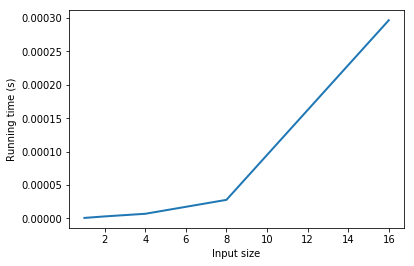

In [28]:
matrix_size = []
results = []
for i in range(5):
    total = 0
    matrix_size.append(2**i)
    for k in range(50):
        A = roadway_matrix(2**i)
        start = time.time()
        result = NAIVE(start_row, start_lane, A)
        end = time.time()
        total += (end - start)
    results.append(total / 50)
    
plt.plot(matrix_size, results, linewidth = 2.0)
plt.xlabel('Input size')
plt.ylabel('Running time (s)')
plt.show()

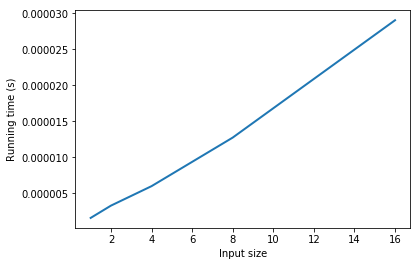

In [29]:
matrix_size = []
results = []
for i in range(5):
    matrix_size.append(2**i)
    total = 0
    for k in range(50):
        A = roadway_matrix(2**i)
        memo = memo_matrix(2**i)
        start = time.time()
        result = Top_down_with_Memo(start_row, start_lane, A, memo)
        end = time.time()
        total += (end - start)
    results.append(total / 50)
    
plt.plot(matrix_size, results, linewidth = 2.0)
plt.xlabel('Input size')
plt.ylabel('Running time (s)')
plt.show()